In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from sphericaltffunctions import *
from recursive_mu import *
from recursive_mu import find_mu_recursive

# Constants (you can update these with actual values)
U0 = 1.0  # Scaling constant
hw = 1.0  # Constant involving hbar and frequency
s = 1.0  # Length scaling factor
delta = 0.5  # Trap parameter
omega = 0.3  # Trap parameter
r_max = 2 # Edge of the computation box
dim = 2 # Number of dimensions in the BEC, for metric factor in integration

In [2]:
# Compute the potential at the center of the trap (r=0)
V0 = V(0, s, delta, omega, hw)

In [3]:
# Compute the minimum value of V(r)
V_min_value = V_min(s, delta, omega, r_max, 1000, hw)
print(f"The minimum value of V(r) is: {V_min_value}")

The minimum value of V(r) is: 0.6000002666150107


In [4]:
# Examples: Plot n(r) for 3 different values of mu
mu_examples = [V0 - 0.15, V0 - 0.1, V0 + 0.1, V0 + 0.2]  # One below V(0), two above

# Call the function with generated mu values and precomputed V_min
compare_mu_to_V_min(mu_examples, V_min_value)

Minimum value of V(r): 0.60


In [5]:
# Compute Thomas-Fermi radii for mu_examples
tf_examples = [tf_radii(mu, s, delta, omega, hw) for mu in mu_examples]

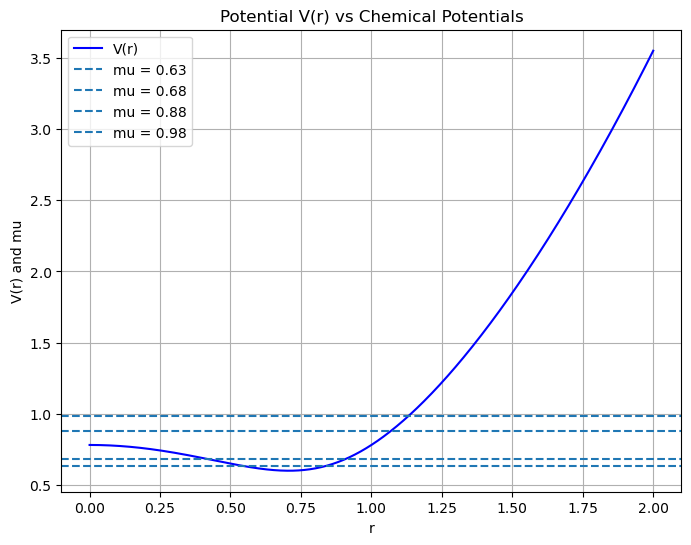

In [6]:
# Compute V(r) values for this range
r_values = np.linspace(0, r_max, 500)
V_values_zoomed = [V(r, s, delta, omega, hw) for r in r_values]

# Plot V(r) and all mu lines for the range [0, 2]
plt.figure(figsize=(8, 6))
plt.plot(r_values, V_values_zoomed, label="V(r)", color="blue")
for mu in mu_examples:
    plt.axhline(y=mu, linestyle="--", label=f"mu = {mu:.2f}")

# Plot settings
plt.xlabel("r")
plt.ylabel("V(r) and mu")
plt.title("Potential V(r) vs Chemical Potentials")
plt.legend()
plt.grid()
plt.show()

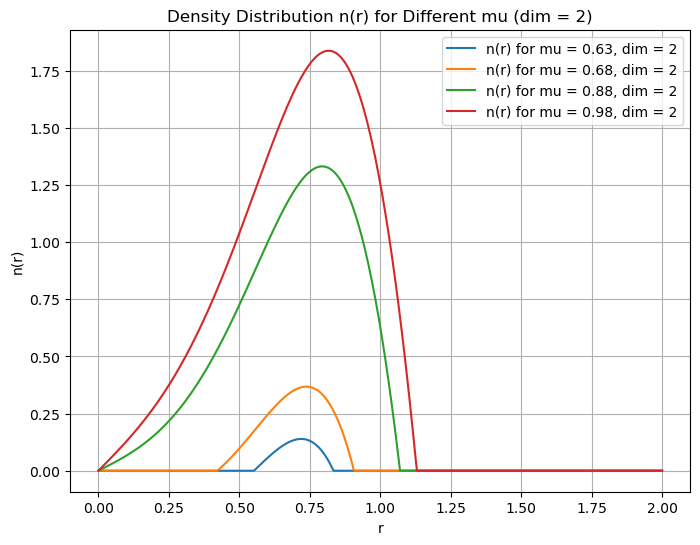

In [7]:
# Initialize plot
plt.figure(figsize=(8, 6))
for mu in mu_examples:
    n_values = [n_r(r, mu, s, delta, omega, U0, dim, hw) for r in r_values]
    plt.plot(r_values, n_values, label=f"n(r) for mu = {mu:.2f}, dim = {dim}")

# Plot settings
plt.xlabel("r")
plt.ylabel("n(r)")
plt.title(f"Density Distribution n(r) for Different mu (dim = {dim})")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Constants
N_target = 50000
dN = 0.01

# Find mu using the recursive function
mu_final = find_mu_recursive(N_mu, V, tf_radii, s, delta, omega, U0, dim, N_target, dN, hw)
print(f"Final mu for N_target = {N_target}: mu = {mu_final}")

N_current = 0.36900353870179575, mu = 0.7810249675906654
N_current = 15974.838502661723, mu = 100.36170833540051
N_current = 35645.62391802566, mu = 150.15205001930542
N_current = 48401.638893912146, mu = 175.04722086125787
N_current = 55509.79968783625, mu = 187.4948062822341
N_current = 51894.873225920324, mu = 181.27101357174598
N_current = 50133.044540777344, mu = 178.15911721650193
N_current = 49263.53883718078, mu = 176.6031690388799
N_current = 49697.34096898625, mu = 177.3811431276909
N_current = 49914.95507488954, mu = 177.7701301720964
N_current = 50023.94038783613, mu = 177.96462369429918
N_current = 49969.43287636341, mu = 177.8673769331978
N_current = 49996.68291834994, mu = 177.9160003137485
N_current = 50010.310724655574, mu = 177.94031200402384
N_current = 50003.49658939339, mu = 177.92815615888617
N_current = 50000.089695844326, mu = 177.92207823631733
N_current = 49998.38629259028, mu = 177.9190392750329
N_current = 49999.23799059061, mu = 177.92055875567513
N_current